# Implementation Practice.1-3
## Forward and Backward Propagation with $y = \theta x$

이번 Practice1-3에서는 Practice1-2에서 다뤘던 cost를 통한 parameter update에서 for loop을 사용하지 않고 np.dot()을 이용한 Vectorization으로 코드를 작성해본다.

먼저 우리가 가지고 있는 data의 shape은 다음과 같다.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([1, 2, 3, 4, 5])
y_data = np.array([1, 2, 3, 4, 5])

print(x_data.shape, y_data.shape)

(5,) (5,)


Practice1-2에서 $l^{(1)}, l^{(2)}, l^{(3)}, l^{(4)}, l^{(5)}$를 따로 구해 cost를 구했다면 Practice1-3에서는 이 loss들을 vector로 만든 L로 구해서 cost를 구할 것이다.

위의 표시와 같이 vectorized가 되지 않은 값들을 소문자, vectorization이 된 값들을 대분자로 나타내면 다음과 같은 표기가 가능하다.

$ X = $ [ $x^{(1)},\; x^{(2)},\; x^{(3)},\; x^{(4)},\; x^{(5)} $ ]

$ Y = $ [ $y^{(1)},\; y^{(2)},\; y^{(3)},\; y^{(4)},\; y^{(5)} $ ]

$ Z_{1} = $ [ $z_{1}^{(1)},\; z_{1}^{(2)},\; z_{1}^{(3)},\; z_{1}^{(4)},\; z_{1}^{(5)} $ ]

$ Z_{2} = $ [ $z_{2}^{(1)},\; z_{2}^{(2)},\; z_{2}^{(3)},\; z_{2}^{(4)},\; z_{2}^{(5)} $ ]

$ L = $ [ $l^{(1)},\; l^{(2)},\; l^{(3)},\; l^{(4)},\; l^{(5)} $ ]

$ dL = $ [ $dl^{(1)},\; dl^{(2)},\; dl^{(3)},\; dl^{(4)},\; dl^{(5)} $ ]

$ dZ_{2} = $ [ $dz_{2}^{(1)},\; dz_{2}^{(2)},\; dz_{2}^{(3)},\; dz_{2}^{(4)},\; dz_{2}^{(5)} $ ]

$ dZ_{1} = $ [ $dz_{1}^{(1)},\; dz_{1}^{(2)},\; dz_{1}^{(3)},\; dz_{1}^{(4)},\; dz_{1}^{(5)} $ ]

NumPy의 연산특징을 이용해 1 epoch에 대한 위의 값들을 차례대로 구해보자.

In [9]:
##### Your Code(Forward Propagation) #####
class minus_node():
    def __init__(self):
        self.x,self.y,self.z = None,None,None
    def forward(self,x,y):
        self.x, self.y, self.z = x, y, x - y
        return self.z
    def backward(self,dL):
        return dL, -1 * dL
##### Your Code(Forward Propagation) #####
class mul_node():
    def __init__(self):
        self.x, self.y, self.z = None, None, None
        
    def forward(self, x, y):
        self.x, self.y, self.z = x, y, x*y
        return self.z
    def backward(self, dL):
        return self.y*dL, self.x*dL   
class square_node():
    def __init__(self):
        self.x, self.z = None, None
    
    def forward(self, x):
        self.x, self.z = x, x*x
        return self.z
    
    def backward(self, dL):
        return 2*self.z*dL
class cost_node():
    def __init__(self):
        self.x, self.z = None, None
    
    def forward(self, x):
        self.x = x
        self.z = np.mean(self.x)
        return self.z
    def backward(self):
        return 1/len(self.x)*np.ones(shape = (len(self.x)))
    
##### Your Code(Backward Propagation) #####


##### Your Code(Backward Propagation) #####
minus = minus_node()
test = np.array([1,2,3,4,5])
test2 = np.array([1,1,1,1,1])
print(minus.forward(test,test2))

[0 1 2 3 4]


위의 코드를 이용하여 Practice1-2에서 했던 learning process를 vectorization된 형태로 구현하시오.

Text(0.5, 1.0, '$\\theta$')

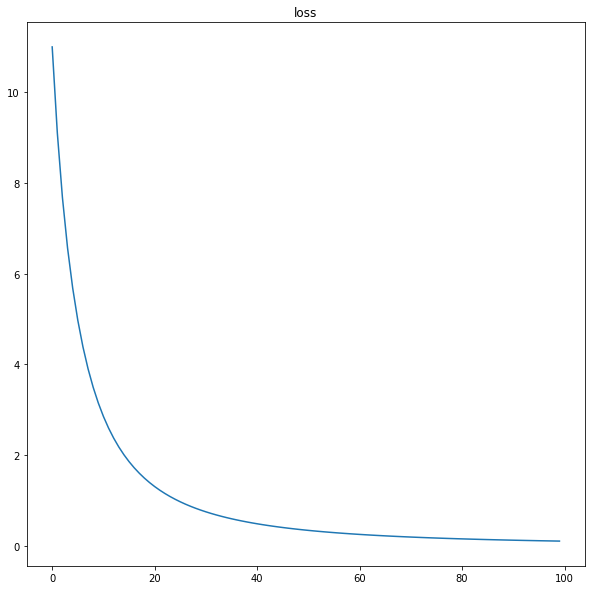

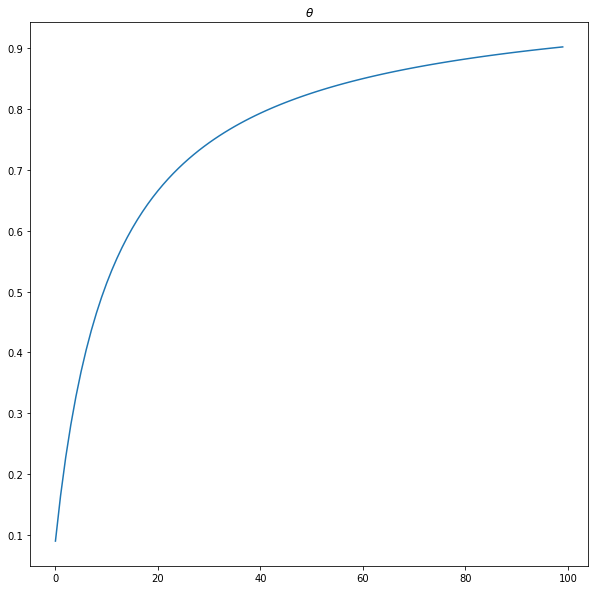

In [11]:
theta = 0
lr = 0.001
epochs = 100

z1_node = mul_node()
z2_node = minus_node()
z3_node = square_node()
c_node = cost_node()

loss_list = []
theta_list = []
for i in range(epochs):
    
    gradient_np = np.empty(0)
    theta_np = np.empty(0)
    

    ##### Your Code(Forward Propagation) #####
    z1 = z1_node.forward(x_data,theta)
    z2 = z2_node.forward(y_data,z1)
    z3 = z3_node.forward(z2)
    
    ##### Your Code(Forward Propagation) #####
    
        
    cost = c_node.forward(z3)
    loss_list.append(cost)
    dz = c_node.backward()
    
    dz2 = z3_node.backward(dz)
    dy, dz1 = z2_node.backward(dz2)
    dx,dtheta = z1_node.backward(dz1)
    theta = theta - lr*np.mean(dtheta)
    theta_list.append(theta)

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(loss_list)
ax.set_title("loss")

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(theta_list)
ax.set_title(r"$\theta$")